In [83]:
import pandas as pd
import numpy as np
mel_data=pd.read_csv("melb_data.csv")

In [84]:
mel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9548 entries, 0 to 9547
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         9548 non-null   object 
 1   Address        9548 non-null   object 
 2   Rooms          9548 non-null   int64  
 3   Type           9548 non-null   object 
 4   Price          9548 non-null   int64  
 5   Method         9548 non-null   object 
 6   SellerG        9548 non-null   object 
 7   Date           9548 non-null   object 
 8   Distance       9548 non-null   float64
 9   Postcode       9548 non-null   int64  
 10  Bedroom2       9548 non-null   int64  
 11  Bathroom       9548 non-null   int64  
 12  Car            9486 non-null   float64
 13  Landsize       9548 non-null   int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    8181 non-null   object 
 17  Lattitude      9548 non-null   float64
 18  Longtitu

In [85]:
mel_data.drop('Suburb',axis=1,inplace=True)
mel_data.drop('Address',axis=1,inplace=True)
mel_data.drop('SellerG',axis=1,inplace=True)
mel_data.drop('CouncilArea',axis=1,inplace=True)
mel_data.drop('Propertycount',axis=1,inplace=True)

In [86]:
mel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9548 entries, 0 to 9547
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         9548 non-null   int64  
 1   Type          9548 non-null   object 
 2   Price         9548 non-null   int64  
 3   Method        9548 non-null   object 
 4   Date          9548 non-null   object 
 5   Distance      9548 non-null   float64
 6   Postcode      9548 non-null   int64  
 7   Bedroom2      9548 non-null   int64  
 8   Bathroom      9548 non-null   int64  
 9   Car           9486 non-null   float64
 10  Landsize      9548 non-null   int64  
 11  BuildingArea  7130 non-null   float64
 12  YearBuilt     8205 non-null   float64
 13  Lattitude     9548 non-null   float64
 14  Longtitude    9548 non-null   float64
 15  Regionname    9548 non-null   object 
dtypes: float64(6), int64(6), object(4)
memory usage: 1.2+ MB


In [87]:
mel_data['Date'] = pd.DatetimeIndex(mel_data['Date']).year

Text(0.5, 1.0, 'House price')

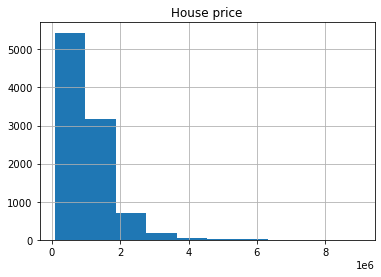

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
mel_data['Price'].hist()
plt.title('House price')

In [89]:
mel_data['Method'].value_counts() 

S     6176
SP    1270
PI    1148
VB     886
SA      68
Name: Method, dtype: int64

<AxesSubplot:title={'center':'Number of bedrooms'}>

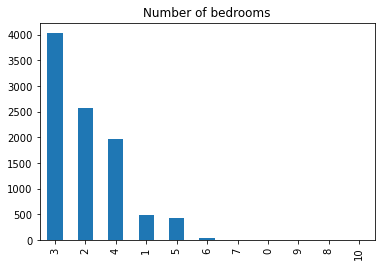

In [90]:
mel_data['Bedroom2'].value_counts().plot(kind='bar', 
                                         title='Number of bedrooms')

<AxesSubplot:title={'center':'Number of Bathrooms'}>

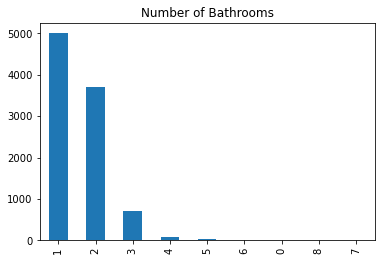

In [91]:
mel_data['Bathroom'].value_counts().plot(kind='bar', 
                                         title='Number of Bathrooms')

In [92]:
pclass_xt = pd.crosstab(mel_data['Bedroom2'], mel_data['Bathroom'])
pclass_xt

Bathroom,0,1,2,3,4,5,6,7,8
Bedroom2,,,,,,,,,
0,1,2,3,0,0,0,0,0,0
1,0,481,7,1,0,0,0,0,0
2,0,2168,393,7,0,0,0,0,0
3,2,2063,1835,131,5,0,0,0,0
4,0,274,1283,363,38,3,0,0,0
5,0,10,176,183,37,20,3,0,0
6,0,2,14,23,6,0,1,0,0
7,0,0,1,4,2,0,0,0,0
8,0,0,0,1,1,0,0,0,0


Text(0, 0.5, 'Bathroom')

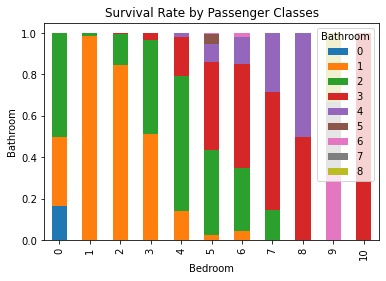

In [93]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)

pclass_xt_pct.plot(kind='bar', 
                   stacked=True, 
                   title='Survival Rate by Passenger Classes')
plt.xlabel('Bedroom')
plt.ylabel('Bathroom')

<AxesSubplot:title={'center':'Years'}>

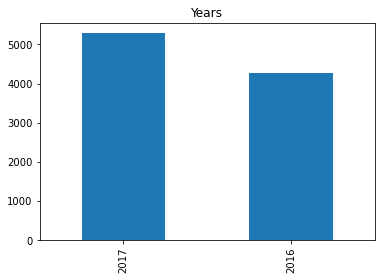

In [94]:
mel_data['Date'].value_counts().plot(kind='bar', 
                                         title='Years')

<AxesSubplot:title={'center':'Distance'}>

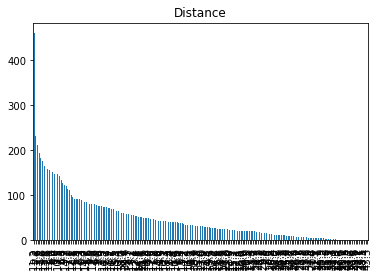

In [95]:
mel_data['Distance'].value_counts().plot(kind='bar', 
                                         title='Distance')

In [96]:
mel_data['ratio']=mel_data['BuildingArea']/mel_data['Landsize']

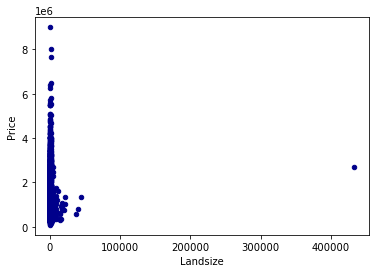

In [97]:
ax1 = mel_data.plot.scatter(x='Landsize',
                      y='Price',
                      c='DarkBlue')

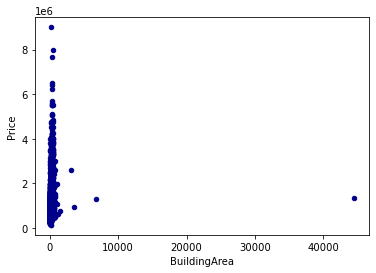

In [98]:
ax1 = mel_data.plot.scatter(x='BuildingArea',
                      y='Price',
                      c='DarkBlue')

Text(0.5, 1.0, 'Built Area')

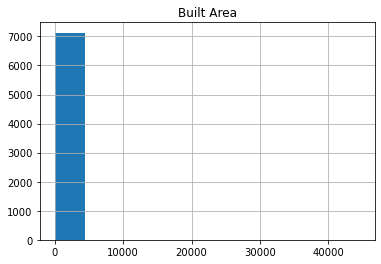

In [99]:
mel_data['BuildingArea'].hist()
plt.title('Built Area')

In [100]:
mel_data['BuildingArea'].mean()

151.96764988779805

In [101]:
mel_data['BuildingArea'].replace(np.NaN,mel_data['BuildingArea'].mean(),inplace=True)

In [102]:
mel_data['Car'].value_counts()

2.0     3986
1.0     3915
0.0      620
3.0      514
4.0      345
5.0       48
6.0       40
8.0        8
7.0        6
10.0       3
9.0        1
Name: Car, dtype: int64

In [103]:
mel_data['Car'].replace(np.NaN,1.0,inplace=True)

In [104]:
mel_data['YearBuilt'].value_counts()

1970.0    866
1960.0    725
1950.0    580
1900.0    341
1980.0    338
         ... 
1897.0      1
1892.0      1
1862.0      1
1942.0      1
1830.0      1
Name: YearBuilt, Length: 144, dtype: int64

In [105]:
mel_data['YearBuilt'].replace(np.NaN,1970,inplace=True)

In [106]:
mel_data['ratio']=mel_data['BuildingArea']/mel_data['Landsize']

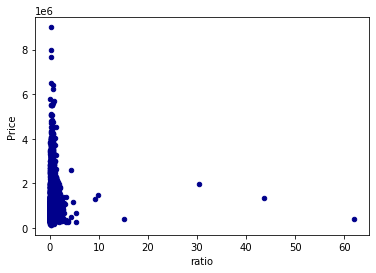

In [107]:
ax1 = mel_data.plot.scatter(x='ratio',
                      y='Price',
                      c='DarkBlue')

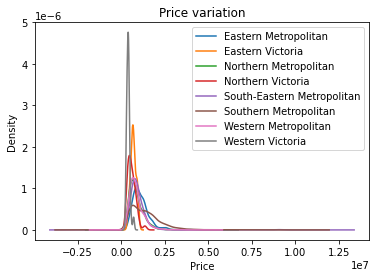

In [108]:
region=sorted(mel_data['Regionname'].unique())
for reg in region:
    mel_data.Price[mel_data.Regionname==reg].plot(kind='kde')

    
plt.title('Price variation')
plt.xlabel('Price')
plt.legend(('Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan','Northern Victoria'
,'South-Eastern Metropolitan','Southern Metropolitan','Western Metropolitan','Western Victoria'), loc='best')

In [109]:
sorted(mel_data['Regionname'].unique())

['Eastern Metropolitan',
 'Eastern Victoria',
 'Northern Metropolitan',
 'Northern Victoria',
 'South-Eastern Metropolitan',
 'Southern Metropolitan',
 'Western Metropolitan',
 'Western Victoria']

In [110]:
mel_data.drop('ratio',axis=1,inplace=True)

In [111]:
mel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9548 entries, 0 to 9547
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rooms         9548 non-null   int64  
 1   Type          9548 non-null   object 
 2   Price         9548 non-null   int64  
 3   Method        9548 non-null   object 
 4   Date          9548 non-null   int64  
 5   Distance      9548 non-null   float64
 6   Postcode      9548 non-null   int64  
 7   Bedroom2      9548 non-null   int64  
 8   Bathroom      9548 non-null   int64  
 9   Car           9548 non-null   float64
 10  Landsize      9548 non-null   int64  
 11  BuildingArea  9548 non-null   float64
 12  YearBuilt     9548 non-null   float64
 13  Lattitude     9548 non-null   float64
 14  Longtitude    9548 non-null   float64
 15  Regionname    9548 non-null   object 
dtypes: float64(6), int64(7), object(3)
memory usage: 1.2+ MB


In [112]:
cols=pd.get_dummies(mel_data['Type'], prefix="Type")
mel_data[cols.columns]=cols
mel_data.drop("Type", axis=1, inplace=True)

In [113]:
cols=pd.get_dummies(mel_data['Method'], prefix="Method")
mel_data[cols.columns]=cols
mel_data.drop("Method", axis=1, inplace=True)

In [114]:
cols=pd.get_dummies(mel_data['Regionname'], prefix="Regionname")
mel_data[cols.columns]=cols
mel_data.drop("Regionname", axis=1, inplace=True)

In [115]:
mel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9548 entries, 0 to 9547
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Rooms                                  9548 non-null   int64  
 1   Price                                  9548 non-null   int64  
 2   Date                                   9548 non-null   int64  
 3   Distance                               9548 non-null   float64
 4   Postcode                               9548 non-null   int64  
 5   Bedroom2                               9548 non-null   int64  
 6   Bathroom                               9548 non-null   int64  
 7   Car                                    9548 non-null   float64
 8   Landsize                               9548 non-null   int64  
 9   BuildingArea                           9548 non-null   float64
 10  YearBuilt                              9548 non-null   float64
 11  Latt

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

y=mel_data['Price']
mel_data.drop('Price',axis=1,inplace=True)
X=mel_data

In [117]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X_train_org, X_out, y_train, y_out = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X_train_org,  y_train, random_state = 0, test_size = 0.2)

# Bagging

We are considering KNN regressor and Decission Tree regressor for bagging. We have selected best regressors among all the models to measure bagging and pasting  effects.

In [44]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
# bagging: bootstrap = True
# pasting: bootstrap = False

dt_clf = DecisionTreeRegressor(random_state=0)
bag_clf = BaggingRegressor(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score = True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [45]:

print('Train error : %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))
print('Out-of-bag score: %.2f'%bag_clf.oob_score_)

Train error : 0.70
Test score: 0.63
Out-of-bag score: 0.69


We can assume model is doing well 70% of the variation in the  data is explained by our model. There seems to be a 6% 
difference between training and test model. But on the other hand we are getting a very good out of the bag score. We shall
use knn model which had given us the best score in phase 1.

In [53]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
# bagging: bootstrap = True
# pasting: bootstrap = False

dt_clf = KNeighborsRegressor()
bag_clf = BaggingRegressor(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, random_state=0, oob_score = True)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [49]:
print('Train error : %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))
print('Out-of-bag score: %.2f'%bag_clf.oob_score_)

Train error : 0.36
Test score: 0.32
Out-of-bag score: 0.36


Boot Strap aggregation works well with Decission tree. Now we shall proceed with Pasting

In [54]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
# bagging: bootstrap = True
# pasting: bootstrap = False

dt_clf = DecisionTreeRegressor(random_state=0)
bag_clf = BaggingRegressor(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)


In [56]:
print('Train error : %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))

Train error : 0.71
Test score: 0.63


Sampling without replacement is giving a better training score than boot straping but test has not changed.

In [57]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
# bagging: bootstrap = True
# pasting: bootstrap = False

dt_clf = KNeighborsRegressor()
bag_clf = BaggingRegressor(dt_clf, n_estimators=500, max_samples=100, bootstrap=False, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [58]:
print('Train error : %.2f'%bag_clf.score(X_train, y_train))
print('Test score: %.2f'%bag_clf.score(X_test, y_test))

Train error : 0.36
Test score: 0.31


Again we can see that we do not see test score improvement but train score has incresed by 1%. We can conclude that 
bootstraping and pasting do not much difference in the output result. Since we are getting better result with decision classifiers lets try ada boost and gradient descent with decision classifier. We can also use KNN regressor for the sake of comparison.

In [85]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(DecisionTreeRegressor(max_depth=1), n_estimators=200, learning_rate=0.01, random_state=0)

ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=1),
                  learning_rate=0.01, n_estimators=200, random_state=0)

In [86]:
print('Train error : %.2f'%ada_clf.score(X_train, y_train))
print('Test score: %.2f'%ada_clf.score(X_test, y_test))

Train error : 0.21
Test score: 0.17


When we tried Ada boost with decision tree a learining rate of 0.5 gave us negative R-square which is a indication of not converging. When we tried with a smaller learning rate we could get a R- square of 21 on training and 17 on test data set.

In [88]:
from sklearn.ensemble import AdaBoostRegressor

ada_clf = AdaBoostRegressor(KNeighborsRegressor(), n_estimators=200, learning_rate=0.01, random_state=0)

ada_clf.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=KNeighborsRegressor(), learning_rate=0.01,
                  n_estimators=200, random_state=0)

In [89]:
print('Train error : %.2f'%ada_clf.score(X_train, y_train))
print('Test score: %.2f'%ada_clf.score(X_test, y_test))

Train error : 0.76
Test score: 0.47


To our surprise Ada boost is doing well with KNN regressor model. It has a training R-square of 76% and test 
R-squatre of 47%.

In [91]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=1.0, random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=200,
                          random_state=0)

In [94]:
print('Train error : %.2f'%gbrt.score(X_train, y_train))
print('Test score: %.2f'%gbrt.score(X_test, y_test))

Train error : 0.90
Test score: 0.68


In [92]:
from  sklearn.ensemble import GradientBoostingRegressor

gbrt_slow = GradientBoostingRegressor(max_depth=1, n_estimators=200, learning_rate=0.1, random_state=0)
gbrt_slow.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=1, n_estimators=200, random_state=0)

In [95]:
print('Train error : %.2f'%gbrt_slow.score(X_train, y_train))
print('Test score: %.2f'%gbrt_slow.score(X_test, y_test))

Train error : 0.70
Test score: 0.63


# PCA

In [44]:
from sklearn.decomposition import PCA

pca=PCA()
pca.fit(X_train)
pca_data=pca.transform(X_train)

In [79]:
X_train

,Rooms,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
1591,3,2016,8.0,3040,3,2,2.0,188,171.00000,1900.0,...,0,0,0,0,0,0,0,0,1,0
3478,2,2016,11.2,3073,2,1,1.0,139,151.96765,1975.0,...,0,0,0,0,1,0,0,0,0,0
4352,2,2016,5.1,3181,2,1,1.0,0,71.00000,1970.0,...,0,1,0,0,0,0,0,1,0,0
2095,2,2016,4.6,3122,3,1,1.0,1585,151.96765,1970.0,...,0,0,0,0,0,0,0,1,0,0
1924,3,2016,13.0,3046,3,1,2.0,696,118.00000,1960.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9476,2,2017,1.8,3051,2,1,1.0,100,67.00000,1890.0,...,0,0,0,0,1,0,0,0,0,0
4032,3,2016,13.5,3020,3,1,2.0,367,114.00000,1970.0,...,1,0,0,0,0,0,0,0,1,0
9320,4,2017,8.8,3081,4,1,1.0,654,151.96765,1960.0,...,0,0,1,0,0,0,0,0,0,0
4083,4,2017,11.2,3127,4,3,4.0,1064,236.00000,1969.0,...,0,0,0,0,0,0,0,1,0,0


In [80]:
X_train_p

array([[-415.31584181,   19.56705335],
       [-464.49553207,    1.35043849],
       [-604.29243172,  -77.24025254],
       ...,
       [  50.47822627,   -3.82245709],
       [ 461.32084035,   76.44694308],
       [-281.06402533,  -56.00082333]])

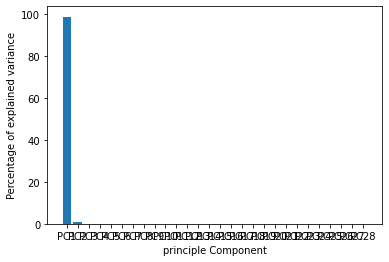

In [45]:
per_var = np.round(pca.explained_variance_ratio_* 100,decimals=1)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1,len(per_var)+1),height=per_var, tick_label=labels)
plt.ylabel('Percentage of explained variance')
plt.xlabel('principle Component')
plt.show()

#### After applying principle component analysis the first two components will contribute for the 100% variation in the data.Hence we can consider PC1 and PC2 for the model analysis.

In [46]:
pca=PCA(0.99)
pca.fit(X_train)
pca_data=pca.transform(X_train)
X_train_p = pca.transform(X_train)
X_test_p = pca.transform(X_test)

### KNN Regressor

In [48]:
from sklearn.neighbors import KNeighborsRegressor
knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
y_pred_KNN_default =knn_reg.predict(X_test)

In [49]:
print(y_pred_KNN_default)

[ 709600.  779700. 1458000. ...  605300.  733100. 1340600.]


In [50]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,14,15,16]}

knn = KNeighborsRegressor()


model_knnreg = GridSearchCV(knn, params, cv=5,scoring = 'neg_mean_absolute_error',return_train_score= True)
model_knnreg.fit(X_train_p, y_train)
print(model_knnreg.best_params_) 
print('Best Score - KNN:', model_knnreg.best_score_)


{'n_neighbors': 16}
Best Score - KNN: -368680.31191693945


In [51]:
result = pd.DataFrame(model_knnreg.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003991,0.000630,0.002790,0.000746,2,{'n_neighbors': 2},-395588.955810,-412111.857610,-413952.418985,-430596.822013,...,-416704.865794,13265.047766,14,-238154.705401,-235694.934022,-235648.670008,-224096.271686,-232614.647606,-233241.845745,4898.602607
1,0.003192,0.000401,0.002991,0.000002,3,{'n_neighbors': 3},-380610.869067,-393280.069285,-396164.107201,-418492.777960,...,-399814.195854,13329.343334,13,-279296.053464,-279488.020185,-280388.811920,-274852.521822,-276493.533824,-278103.788243,2084.350271
2,0.002792,0.000399,0.002796,0.000401,4,{'n_neighbors': 4},-372052.274959,-382621.729337,-385406.667553,-407045.018822,...,-389461.178478,12572.795597,12,-302496.122647,-302429.365436,-301064.444354,-298071.233173,-299906.984298,-300793.629982,1664.033481
3,0.002791,0.000399,0.002788,0.000404,5,{'n_neighbors': 5},-364217.998854,-368804.024877,-377293.284779,-396468.242062,...,-379822.368740,12686.841767,11,-315876.559452,-312563.985925,-309974.512889,-308986.895008,-311336.458429,-311747.682340,2393.706726
4,0.002995,0.000005,0.003011,0.000013,6,{'n_neighbors': 6},-360423.972177,-365011.634206,-377698.227496,-390900.807829,...,-376419.201691,12106.798038,10,-323395.131888,-321721.450116,-317186.994476,-314765.132399,-317689.556772,-318951.653130,3151.194758


In [52]:
result['param_n_neighbors'].shape[0]

14

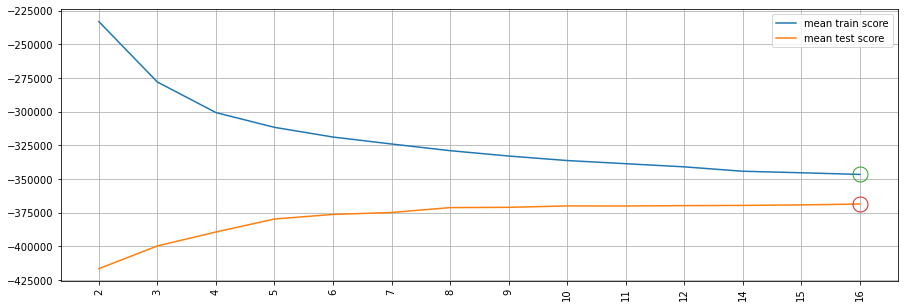

In [53]:
%matplotlib inline

plt.subplots(figsize = (15,5))
plt.plot(range(result['param_n_neighbors'].shape[0]), result['mean_train_score'], label = 'mean train score')
plt.plot(range(result['param_n_neighbors'].shape[0]), result['mean_test_score'], label = 'mean test score')
plt.xticks(range(result['param_n_neighbors'].shape[0]), result['param_n_neighbors'], rotation = 90)
plt.plot([model_knnreg.best_index_], result['mean_train_score'][model_knnreg.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.plot([model_knnreg.best_index_], result['mean_test_score'][model_knnreg.best_index_], 'o', markersize = 15, fillstyle = 'none')
plt.legend()
plt.grid()

In [56]:
knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train,  y_train)
print("Test Score:",knn.score(X_test, y_test))

Test Score: 0.49753953261018435


### Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train_p, y_train)
print(lreg.score(X_train_p, y_train))
print(lreg.score(X_test_p, y_test))

0.005821883062552158
0.008341446272686182


In [61]:
X_train_p.shape

(6110, 2)

In [62]:
print(pca.explained_variance_ratio_)

[0.9894569  0.01020948]


## Neural Network

In [126]:
model = Sequential()
model.add(Dense(13, input_dim=28, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [127]:
model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])

In [135]:
model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
306/306 [==============================] - 0s 657us/step - loss: nan - mse: nan
Epoch 2/100
306/306 [==============================] - 0s 507us/step - loss: nan - mse: nan
Epoch 3/100
306/306 [==============================] - 0s 488us/step - loss: nan - mse: nan
Epoch 4/100
306/306 [==============================] - 0s 484us/step - loss: nan - mse: nan
Epoch 5/100
306/306 [==============================] - 0s 523us/step - loss: nan - mse: nan
Epoch 6/100
306/306 [==============================] - 0s 510us/step - loss: nan - mse: nan
Epoch 7/100
306/306 [==============================] - 0s 513us/step - loss: nan - mse: nan
Epoch 8/100
306/306 [==============================] - 0s 572us/step - loss: nan - mse: nan
Epoch 9/100
306/306 [==============================] - 0s 490us/step - loss: nan - mse: nan
Epoch 10/100
306/306 [==============================] - 0s 530us/step - loss: nan - mse: nan
Epoch 11/100
306/306 [==============================] - 0s 497us/step - loss: n

306/306 [==============================] - 0s 487us/step - loss: nan - mse: nan
Epoch 90/100
306/306 [==============================] - 0s 484us/step - loss: nan - mse: nan
Epoch 91/100
306/306 [==============================] - 0s 461us/step - loss: nan - mse: nan
Epoch 92/100
306/306 [==============================] - 0s 451us/step - loss: nan - mse: nan
Epoch 93/100
306/306 [==============================] - 0s 472us/step - loss: nan - mse: nan
Epoch 94/100
306/306 [==============================] - 0s 494us/step - loss: nan - mse: nan
Epoch 95/100
306/306 [==============================] - 0s 806us/step - loss: nan - mse: nan
Epoch 96/100
306/306 [==============================] - 0s 589us/step - loss: nan - mse: nan
Epoch 97/100
306/306 [==============================] - 0s 594us/step - loss: nan - mse: nan
Epoch 98/100
306/306 [==============================] - 0s 585us/step - loss: nan - mse: nan
Epoch 99/100
306/306 [==============================] - 0s 604us/step - loss: nan -

In [136]:
model.evaluate(X_test, y_test)

48/48 [==============================] - 0s 530us/step - loss: nan - mse: nan


[nan, nan]

In [137]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train score: {:.2f}'.format(r2_score(y_train, y_train_predict)))
print('Test score: {:.2f}'.format(r2_score(y_test, y_test_predict)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [65]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    #compile model
    model.compile(loss='mse', optimizer='sgd' , metrics = ['mse'])
    return model

In [66]:
seed = 10
np.random.seed(10)

In [74]:
model = KerasRegressor(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [ ]:
print("Best: %f using %s" % (grid_search_result.best_score_, grid_search_result.best_params_))